# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Cleaning

In [2]:
data=pd.read_csv("C:/Users/MICRO/Downloads/dailyActivity_merged.csv")

In [3]:
data.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
data.shape

(940, 15)

In [5]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
data.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

####  Converting ActivityDate into Datetime format

In [7]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate']) 
print("\nAfter conversion:")
print(data) 




After conversion:
             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveD

# Exploratory Data Analysis

In [8]:
data.tail(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,2016-05-12,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [10]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data=data.drop_duplicates()

In [14]:
data.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


### Correlation Heatmap

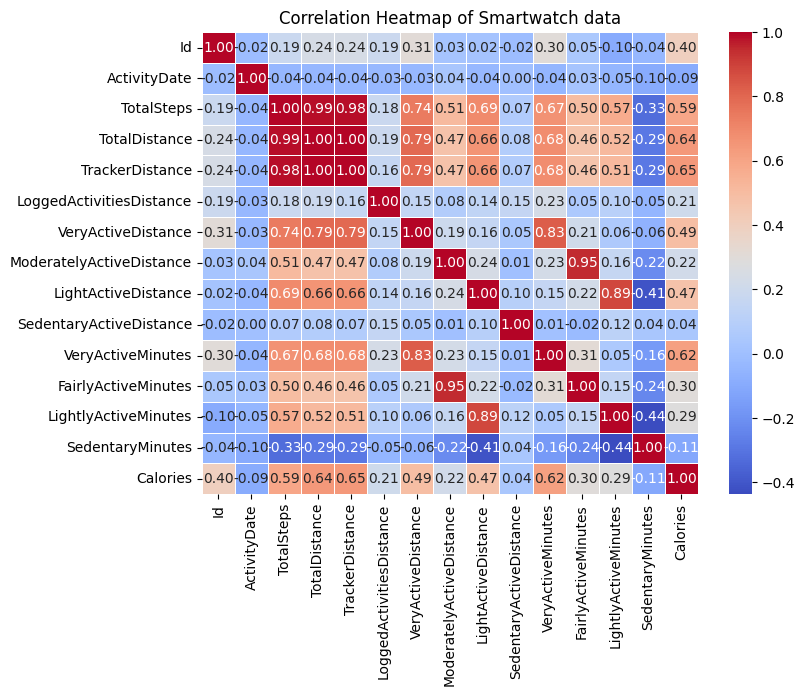

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Smartwatch data')
plt.show()


### Red indicates strong positive correlation.Blue typically indicates strong negative correlation.Neutral colors (white,gray and lighter shades)indicates weak or no correlation.

In [16]:
data['Total active minutes'] = data['VeryActiveMinutes'] + data['FairlyActiveMinutes'] + data['LightlyActiveMinutes'] + data['SedentaryMinutes']

In [17]:
data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total active minutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440


# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = df_numeric.drop(['Calories'], axis = 1)
y = df_numeric['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
df_numeric.head(3)

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


# Regression Models

## 1.Linear Regression

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
 scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
y_pred = model.predict(X_test)

In [35]:
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1414.453663553632
Mean Squared Error (MSE): 3377551.2213174338
Root Mean Squared Error (RMSE): 1837.811530412581
R-squared (R²): -6.145625718391361


In [37]:
print("\nLinear Regression Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Linear Regression Coefficients:
Intercept: 1005.2579190632769
Coefficients: [ 3.77775576e-08 -3.67575624e-01  5.28275086e+02  1.21588388e+02
 -6.63320530e+00 -3.02917521e+02 -2.92204244e+02 -9.28838335e+00
 -6.40988639e+02  1.85895642e+01  1.06246358e+01  5.48316116e-01
  3.74603123e-01]


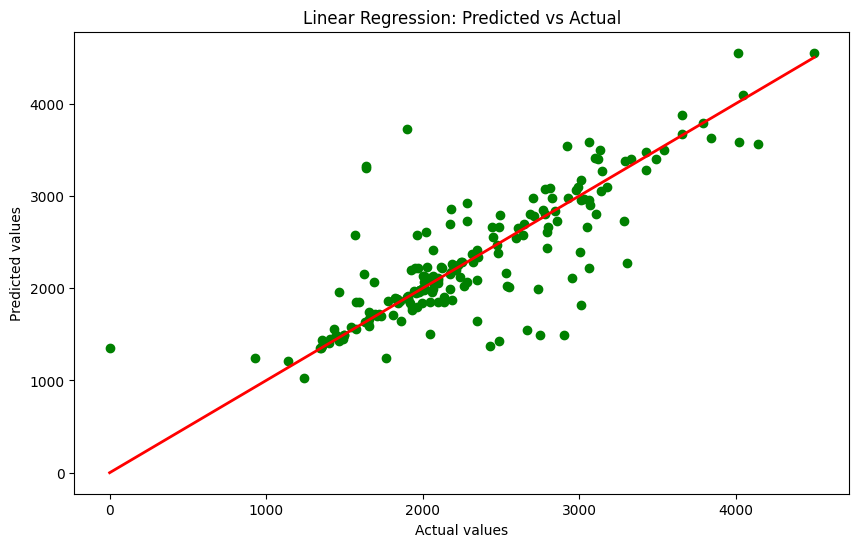

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

#### The green dots represent the actual values(y_test) on the x-axis and the predicted values(y_pred) on the y-axis.If points are close to the red line,it means the model performs well.

## 2.Random Forest Regressor

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred = rf_regressor.predict(X_test_scaled)

In [45]:
print("Random Forest Regressor Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))

Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 193.47296372003763
Mean Squared Error (MSE): 86383.70371166068
Root Mean Squared Error (RMSE): 293.9110472773364
R-squared (R²): 0.8172446324437461


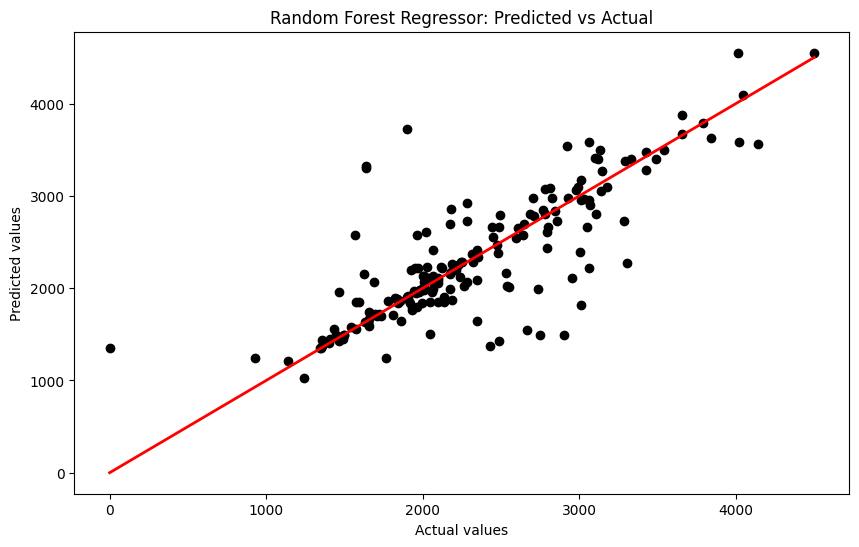

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) 
plt.title('Random Forest Regressor: Predicted vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

#### A Scatter plot is created with the actual values on the x-axis and predicted values on the y-axis.The red line represents the ideal line where the predicted values equals actual values.

## 3.Decision Tree Regressor

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
y_pred = model.predict(X_test_scaled)

In [52]:
print("Decision Tree Regressor Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))

Decision Tree Regressor Model Evaluation:
Mean Absolute Error (MAE): 241.29267408123792
Mean Squared Error (MSE): 175234.96129101093
Root Mean Squared Error (RMSE): 418.6107515234301
R-squared (R²): 0.6292688506811308


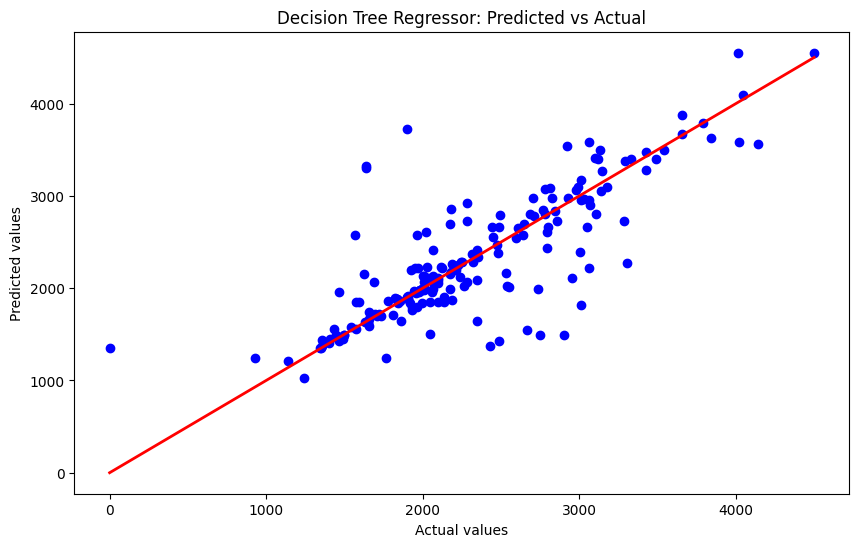

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  
plt.title('Decision Tree Regressor: Predicted vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

#### Rndom forest Regressor model performed well among all models.Decision Tree Regressor is the second best model.Linear Regessor is the least accurate model.